In [1]:
import numpy as np 
import matplotlib.pyplot as plt 


from qnetwork.tools import set_plot_style
set_plot_style()

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.size'] = 14 

In [2]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.size'] = 20 

In [3]:
from aux_funs import DDE_analytical,run_ww_simulation
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def exp_Rabilike(gamma_list:list =[0.02,0.2,2],
				 tau:float = 1,
				 n_modes:int=100,
				 n_steps=2001):

	fig,axs = plt.subplots(figsize=(12,5))
	color_cycle = ['peru','lightskyblue','limegreen']

	for  i,gamma in enumerate(gamma_list):
		freq_ref = np.sqrt(gamma/tau)
		T = 2*np.pi/freq_ref
		t_max = 1.3*T
		t = np.linspace(0,t_max,n_steps)
		e=np.abs(DDE_analytical(gamma=gamma,tau=tau,t=t,phi=0))**2
		_,e_ww = run_ww_simulation(t_max=t_max,gamma=gamma,Delta=100,L=0.5,c=1,n_modes=n_modes,n_steps=n_steps)
		
		axs.plot(freq_ref*t,e_ww,color='k')
		axs.plot(freq_ref*t,e,color=color_cycle[i],linestyle='dashed',label=rf"$\gamma \tau = {gamma*tau:.2f}$")
		
	axs.set_xlabel(r"$\sqrt{ \gamma / \tau } \,  t $")
	axs.set_ylabel(r"$\langle \sigma^{+} \sigma^{-} \rangle $")
	axs.legend()


	fig.savefig('figure_1_new.pdf')
	plt.show()
		
	return fig,axs

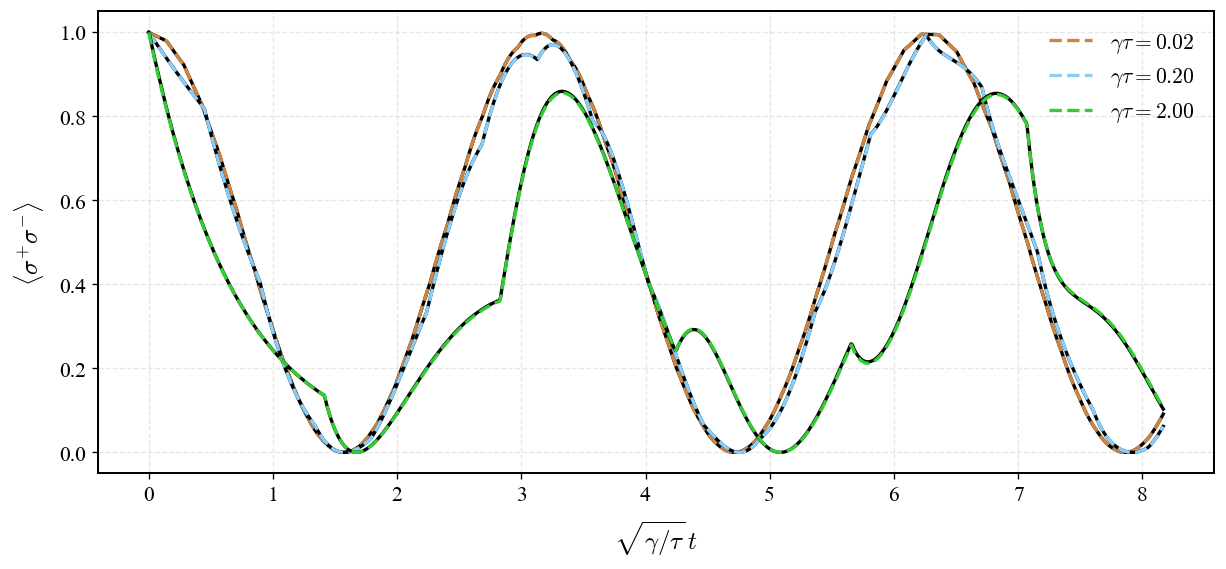

In [16]:
fig,axs=exp_Rabilike()
fig.savefig('figure_1a_new.pdf')

In [4]:
from aux_funs import paralelizar

def exp_discontinuities(gamma_min:float=0.005,
						gamma_max:float = 1,
						n_gammas: int = 30,
						tau: float = 1,
						n_steps: int = 10000):
	gamma_range = np.linspace(gamma_min,gamma_max,n_gammas)
	t_max=1.05*tau
	t = np.linspace(0,t_max,n_steps)
	id = np.argmax(t>=tau)
	print(t[id])
	print(t[id-1])

	def sample_gamma(gamma):
		e = DDE_analytical(gamma=gamma,phi=0,tau=tau,t=t)**2
		de_dt_1 = np.gradient(e,t)
		dif_dde = np.abs(de_dt_1[id+2]-de_dt_1[id-2])
		
		_,e_ww = run_ww_simulation(gamma=gamma,L=0.5,c=1,n_steps=n_steps,n_modes=150,t_max=t_max)
		de_dt_2 = np.gradient(e_ww,t)
		dw_1=np.abs(np.mean(de_dt_2[id-700:id-200]))
		dw_2 = np.abs(np.mean(de_dt_2[id+10:id+200]))
		dif_ww = np.abs(dw_1-dw_2)

		return [dif_dde,dif_ww]
	data = np.asarray(paralelizar(gamma_range,sample_gamma))
	fig,axs = plt.subplots(figsize=(10,5))
	
	
	axs.plot(gamma_range,2*gamma_range*np.exp(-gamma_range*tau/2),'k',label=r"$\frac{\gamma}{2}e^{-\gamma \tau /2} $")
	axs.plot(gamma_range,data[:,0],linestyle='dashed',label='DDE',color='orange')
	axs.plot(gamma_range,data[:,1],linestyle='dashed',label='WW',color='limegreen')
	axs.set_xscale('log')
	axs.set_yscale('log')
	axs.set_xlabel(r"$\gamma \tau $ ")
	axs.legend()
	plt.show()
	return data 
		


In [20]:
def exp_discontinuities_2(gamma_min:float=0.005,
						gamma_max:float = 1,
						n_gammas: int = 50,
						tau: float = 1,
						N_periods: int = 20,
						N_dt_tau:int = 5000):
	gamma_range = np.linspace(gamma_min,gamma_max,n_gammas)
	t_max=(N_periods+1)*tau
	t = np.arange(0,t_max,tau/N_dt_tau)
	id_list = [[n*N_dt_tau-1,n*N_dt_tau+1] for n in range(N_periods)]

	def sample_gamma(gamma):
		e = DDE_analytical(gamma=gamma,phi=0.0*np.pi,tau=tau,t=t)**2
		de_dt = np.gradient(e,t)
		dif =[]
		for id_set in id_list:
			id1=id_set[0]
			id2=id_set[1]
			dif.append(np.abs(de_dt[id2]-de_dt[id1]))
		return np.mean(np.asarray(dif))
	
	data = np.asarray(paralelizar(gamma_range,sample_gamma))
	fig,axs =plt.subplots()
	axs.plot(gamma_range,data,label=r" M.V. discontinuities")
	axs.plot(gamma_range,gamma_range,color='grey',linestyle='dashed',label=r"$\gamma \tau$")
	axs.set_xlabel(r"$\gamma \tau $")
	#axs.set_yscale('log')
	#axs.set_xscale('log')
	axs.legend()
	plt.show()
	
	return data 

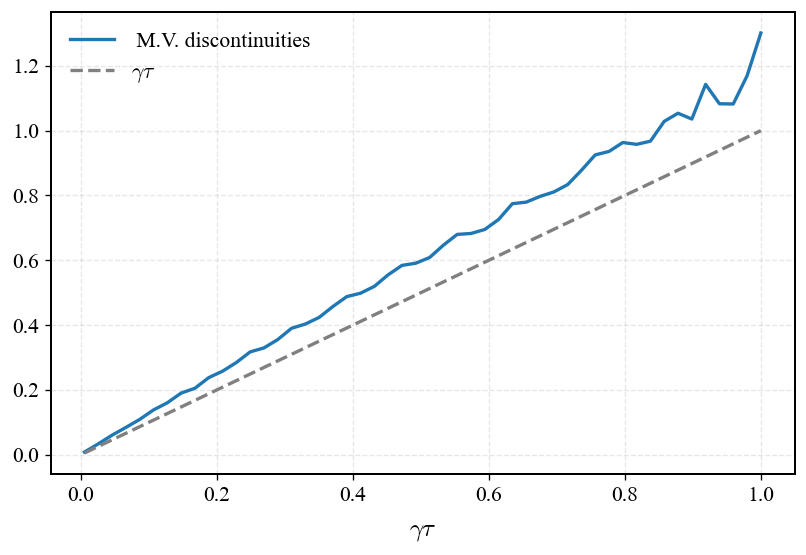

In [22]:
data = exp_discontinuities_2(gamma_max=1.0,N_periods=54,N_dt_tau=4000)

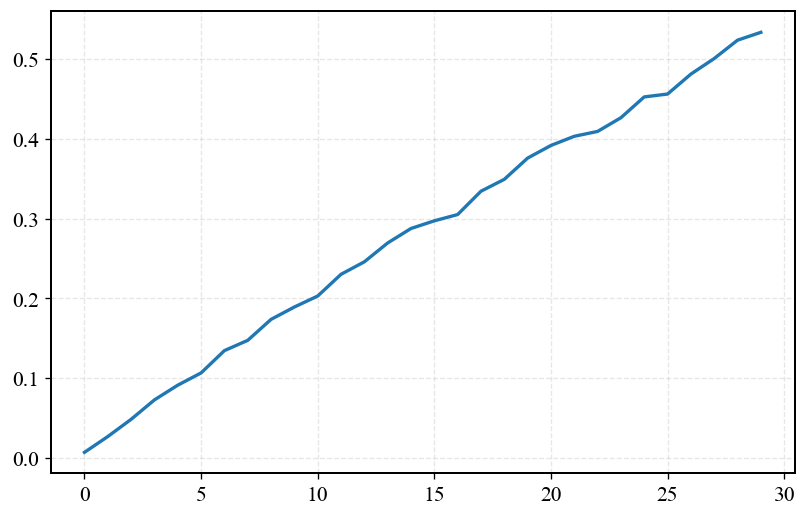

In [8]:
plt.plot(data)

In [165]:
tau=1
n_steps=10000
gamma_test=0.1
t_max=1.05*tau
t = np.linspace(0,t_max,n_steps)
id = np.argmax(t>=tau)
_,e_ww = run_ww_simulation(gamma=gamma_test,L=0.5,c=1,n_steps=n_steps,n_modes=250,t_max=t_max)
de_dt_2 = np.gradient(e_ww,t)

e=np.abs(DDE_analytical(gamma=gamma_test,tau=1,phi=0,t=t))**2
de = np.gradient(e,t)



(0.7, 1.3)

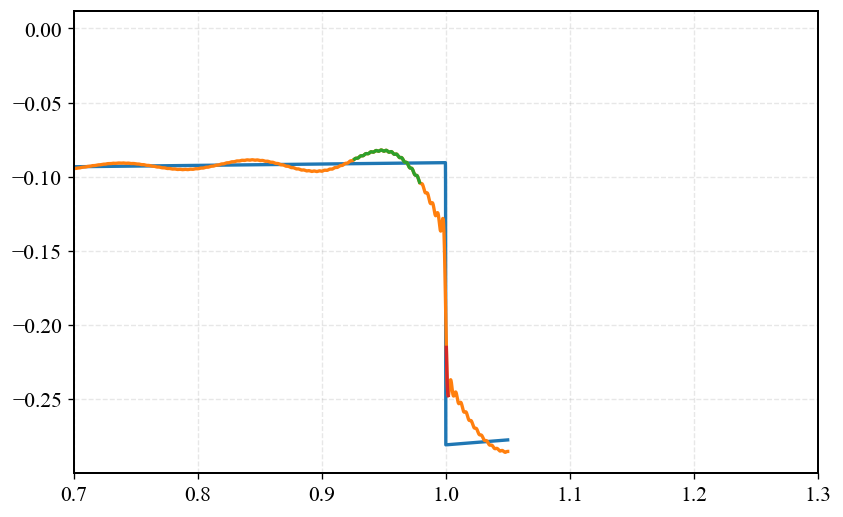

In [166]:
plt.plot(t,de)

plt.plot(t,de_dt_2)
plt.plot(t[id-700:id-200],de_dt_2[id-700:id-200])
plt.plot(t[id+5:id+20],de_dt_2[id+5:id+20])
plt.xlim(0.7,1.3)

(-1.0, 3.0)

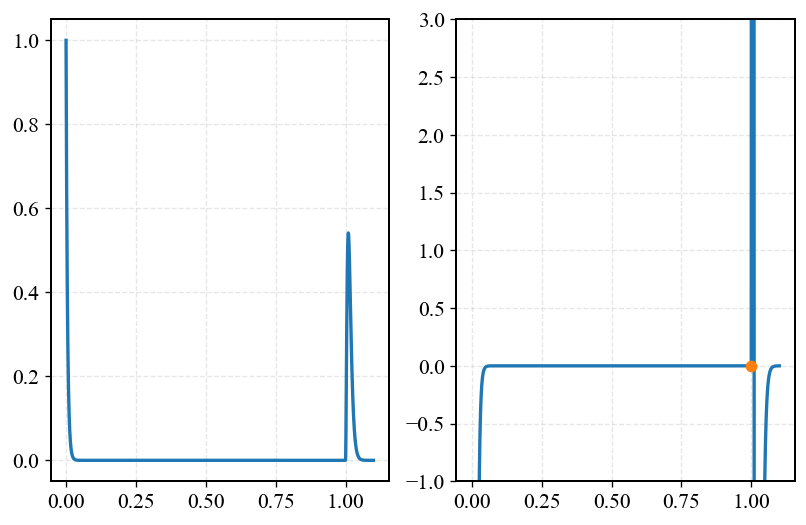

In [ ]:
gamma_list = [2,0.2,0.02]
tau = 1 
n_steps = 2000

fig,axs = plt.subplots(2,1,figsize=(12,10))
color_cycle = ['peru','lightskyblue','limegreen']

for  i,gamma in enumerate(gamma_list):
	freq_ref = np.sqrt(gamma/tau)
	T = 2*np.pi/freq_ref
	t_max = 2.3*T
	t = np.linspace(0,t_max,n_steps)
	e=np.abs(DDE_analytical(gamma=gamma,tau=tau,t=t,phi=0))**2
	_,e_ww = run_ww_simulation(t_max=t_max,gamma=gamma,Delta=100,L=0.5,c=1,n_modes=150,n_steps=n_steps)
	de_dt = np.gradient(e,t)
	de_dt_ww = np.gradient(e_ww,t)
	
	axs[0].plot(freq_ref*t,e_ww,color='k')
	axs[0].plot(freq_ref*t,e,color=color_cycle[i],linestyle='dashed',label=rf"$\gamma \tau = {gamma*tau:.2f}$")
	

	
	axs[1].plot(t/tau,de_dt_ww,color='k')
	axs[1].plot(t/tau,de_dt,color=color_cycle[i],linestyle='dashed',label=rf"$\gamma \tau = {gamma*tau:.2f}$")
	
	
	

axs[0].set_xlabel(r"$\sqrt{ \gamma / \tau } \,  t $")
axs[0].set_ylabel(r"$\langle \sigma^{+} \sigma^{-} \rangle $")
axs[0].set_xlim(0,7)
axs[0].legend()

axs[1].set_xlabel(r"$t /\tau  $")
axs[1].set_ylabel(r"$\frac{1}{\gamma}\,  \frac{d  \langle 	\sigma^{+}\sigma^{-}\rangle }{dt} $")
axs[1].set_xlim(0.05,7)
#axs[1].set_ylim(-8,3)


# fig.savefig('figure_1_new.pdf')
plt.show()

Note: add a graph showing the scale of the discontinuities with time. It justifies the oscillations in the fidelity, and why it has not been observed. 

In [203]:
np.asarray(data).shape

(201, 2)

# 1. piece-wise differentiable dynamics 

When we include many modes in the dynamics, the derivative becomes discontinuous. This can be seen analyzing WW simulations, or directly derived from our Delayed Differential Equations 

/home/carlosb/Documents/python_projects/non_markovian_qubit_swap/experiment_0.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


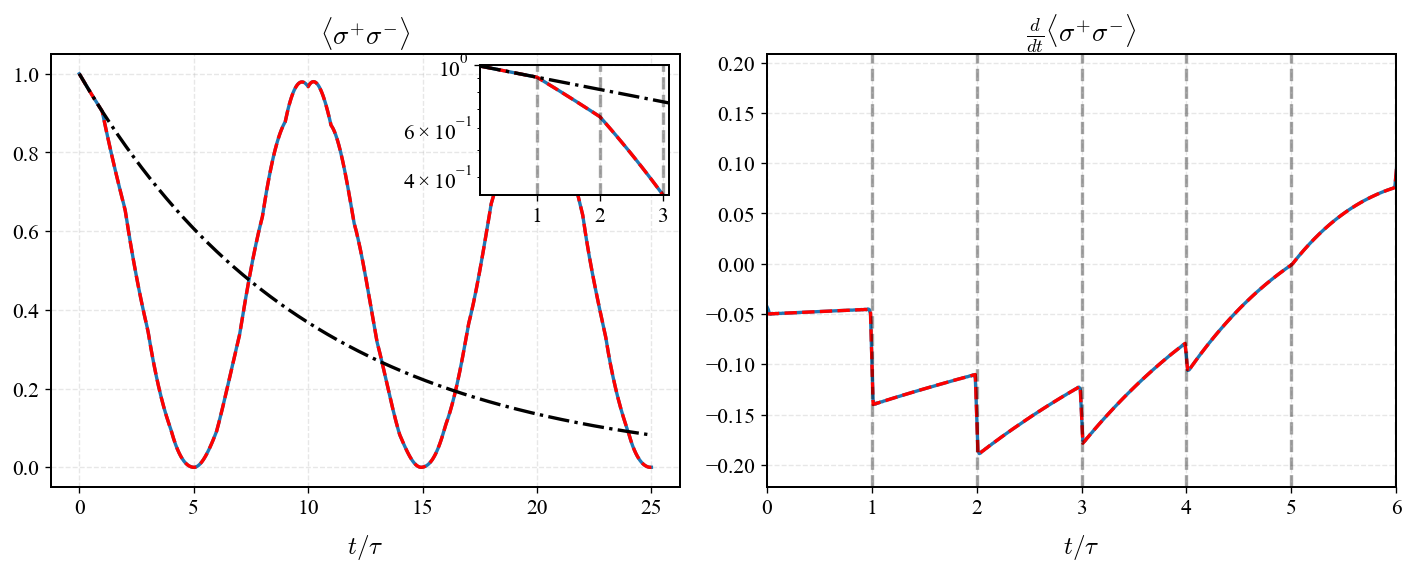

In [2]:
exp000(Delta=50,gamma=0.05,periods_derivative=6,n_steps=2001,n_modes=100)

# 2. Delayed Differential Equations match cavities in high energies 

In [ ]:
from aux_funs import DDE_analytical,run_ww_simulation

def exp001(t_max: float = 10, 
		   gamma: float = 1 ,
		   L: float = 1,
		   c:float = 1,
		   Delta_list: list = [1,2,5,50],
		   n_steps: int = 201,
		   n_modes:int = 50):
	
	tau = 2*L/c


	t = np.linspace(0,t_max,n_steps)
	phi = 0
	e = (DDE_analytical(gamma=gamma,phi=phi,tau=tau,t=t))**2
	color_cycle = []
	linestyle_cycle =[]
	fig,axs = plt.subplots(figsize=(12,5))
	plt.plot(t,e,'k',label ='DDE')

	for i,Delta in enumerate(Delta_list):
		t,e_ww = run_ww_simulation(t_max=t_max,gamma=gamma,Delta=Delta,L=L,c=c,n_steps=n_steps,n_modes=n_modes)
		axs.plot(t,e_ww,label =rf"$\omega_e = {Delta:.0f}\omega_0 $")
	axs.legend()
	
	fig.tight_layout()
	plt.show()

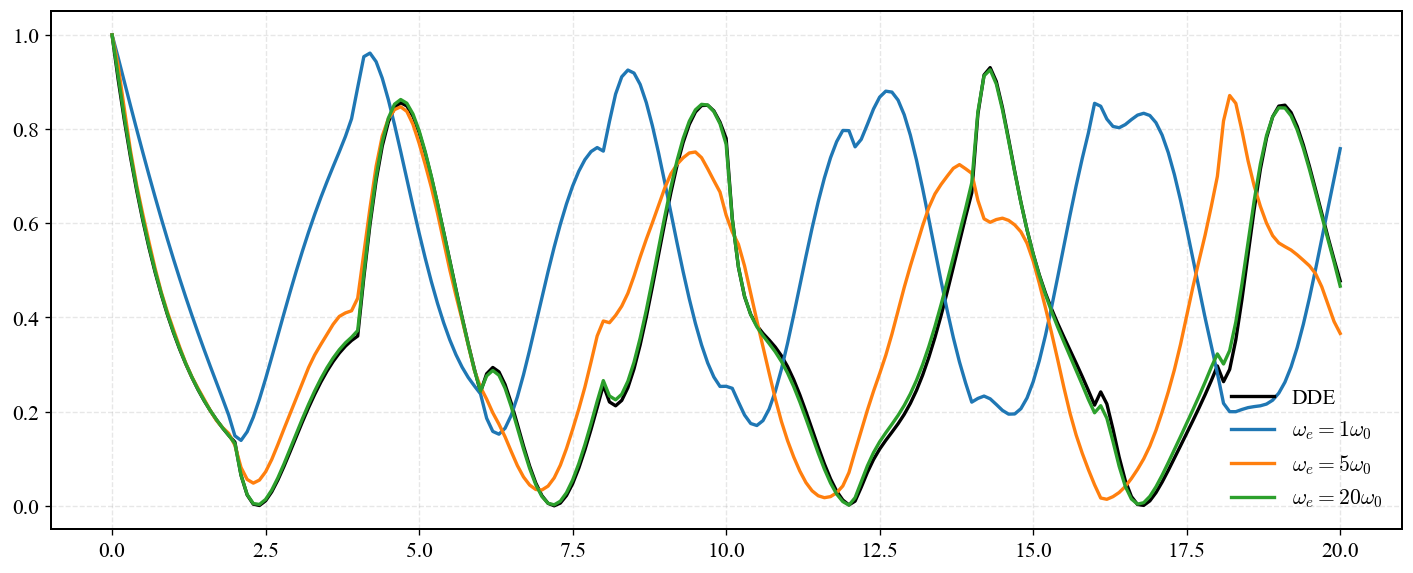

In [9]:
exp001(t_max=20,gamma=1,Delta_list=[1,5,20])

# 3. Lamb shift and gamma corrections improve the oscillations 

min. excitation level: 0.01000777086428138


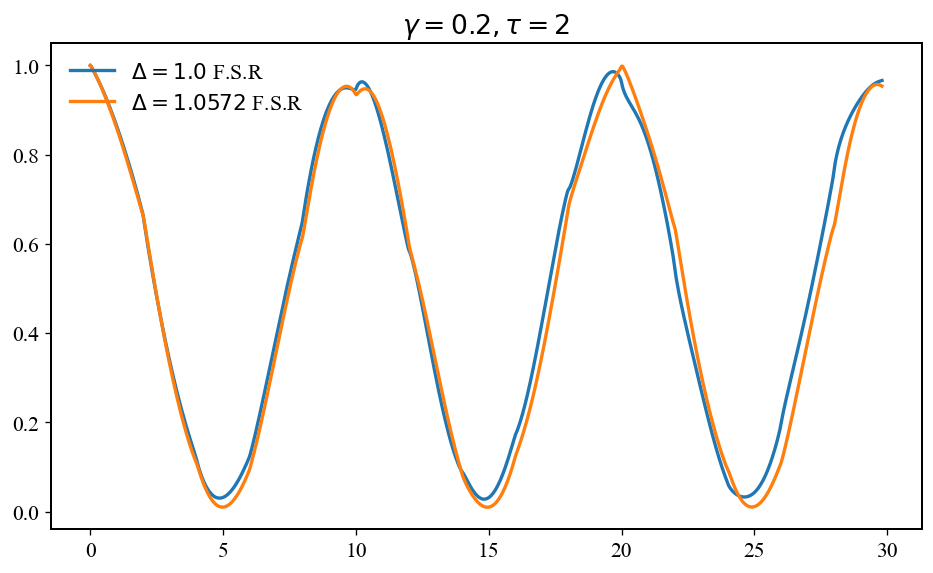

In [ ]:
exp002(gamma=0.2)

## 3.1 parameters corrections vs Qubits freq $\Delta $ 

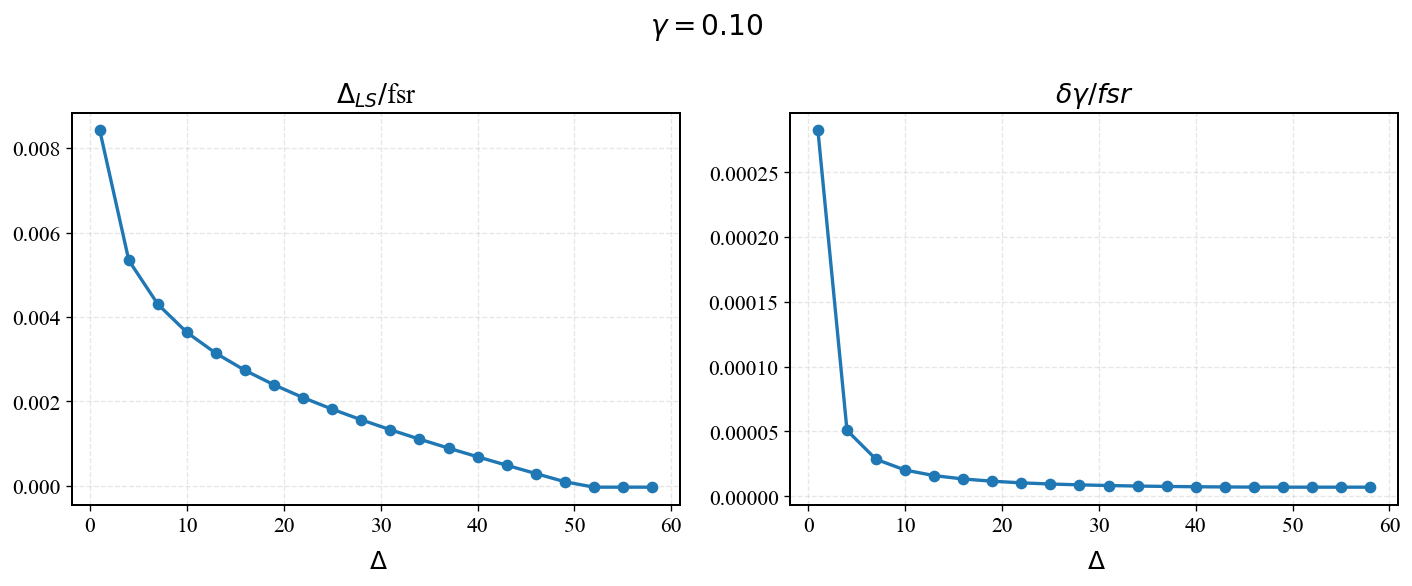

In [ ]:
Delta_list_1 = list(range(1,60,3))
ls1,gs1=exp003(Delta_0=None,gamma_0=0.1,Delta_list=Delta_list_1 ,gamma_list=None,n_modes=100,n_steps=1001,scale_log_y=False,scale_log_x=False,method_m='TNC')

# aqui encuentra ceros en la variacion en frecuencia. Tengo que mirar si es la precision numérica o qué está pasando. 

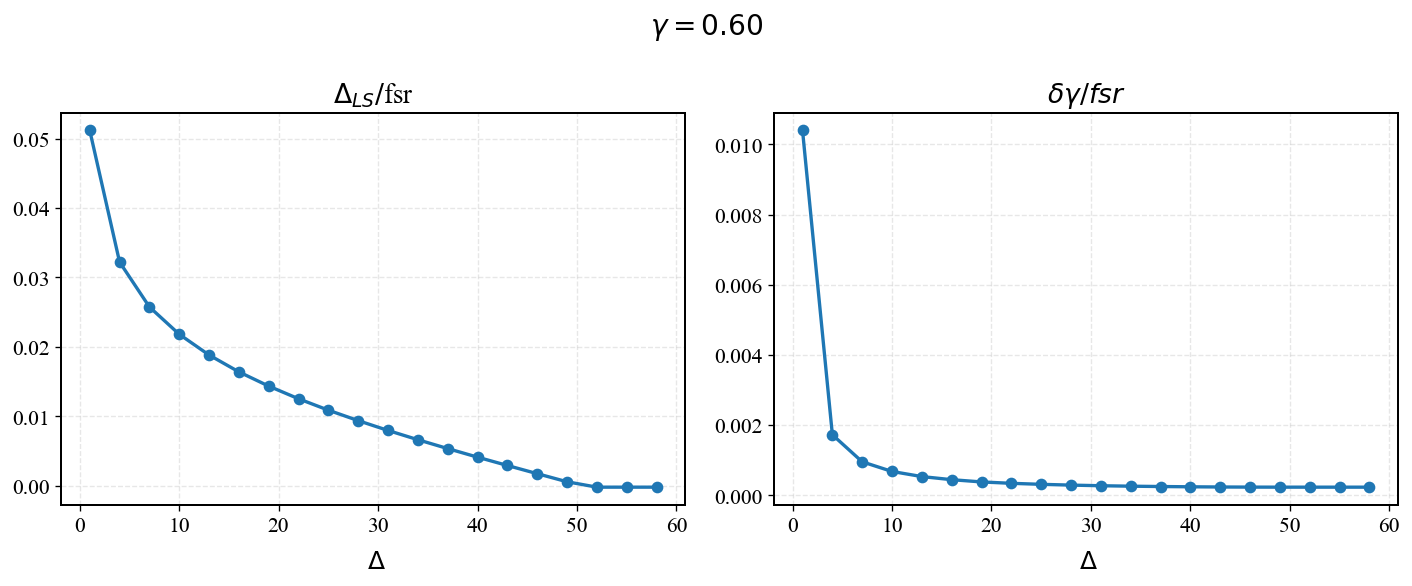

In [6]:
Delta_list_2 = list(range(1,60,3))
ls2,gs2=exp003(Delta_0=None,gamma_0=0.6,Delta_list=Delta_list_2 ,gamma_list=None,n_modes=100,n_steps=1001,scale_log_y=False,scale_log_x=False,method_m='TNC')

## 3.2 parameters corrections vs coupling strength $\gamma $ 

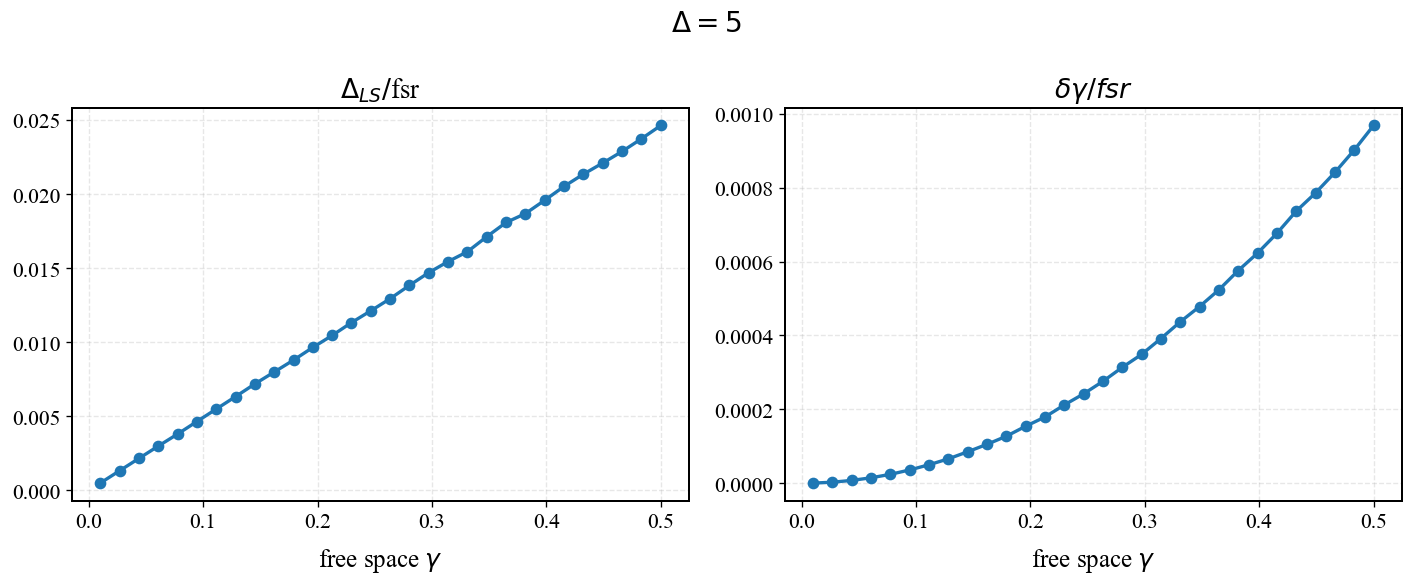

In [7]:
_=exp003(Delta_0=5,n_modes=100,n_steps=1001,method_m='TNC',scale_log_x=False,scale_log_y=False)

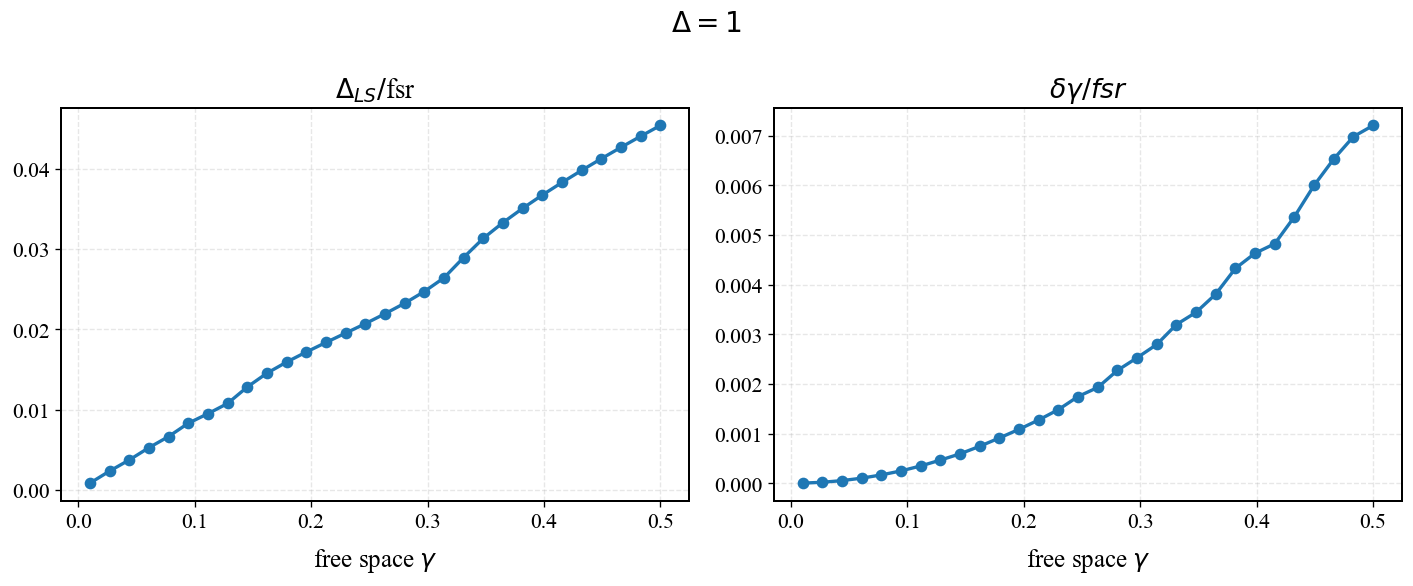

In [9]:
_=exp003(Delta_0=1,n_modes=120,n_steps=1001,method_m='TNC',scale_log_x=False,scale_log_y=False)
# method TNC

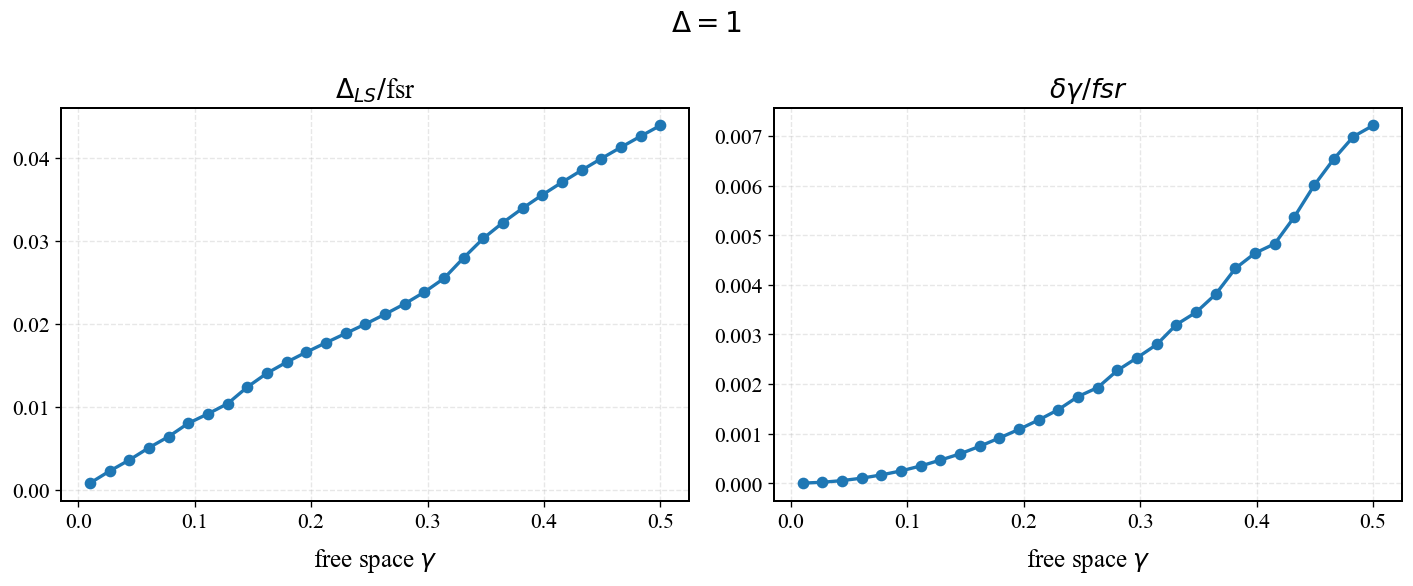

In [10]:
_=exp003(Delta_0=1,n_modes=100,n_steps=1001,method_m='L-BFGS-B',scale_log_x=False,scale_log_y=False)
# metodo: L-BFGS-B

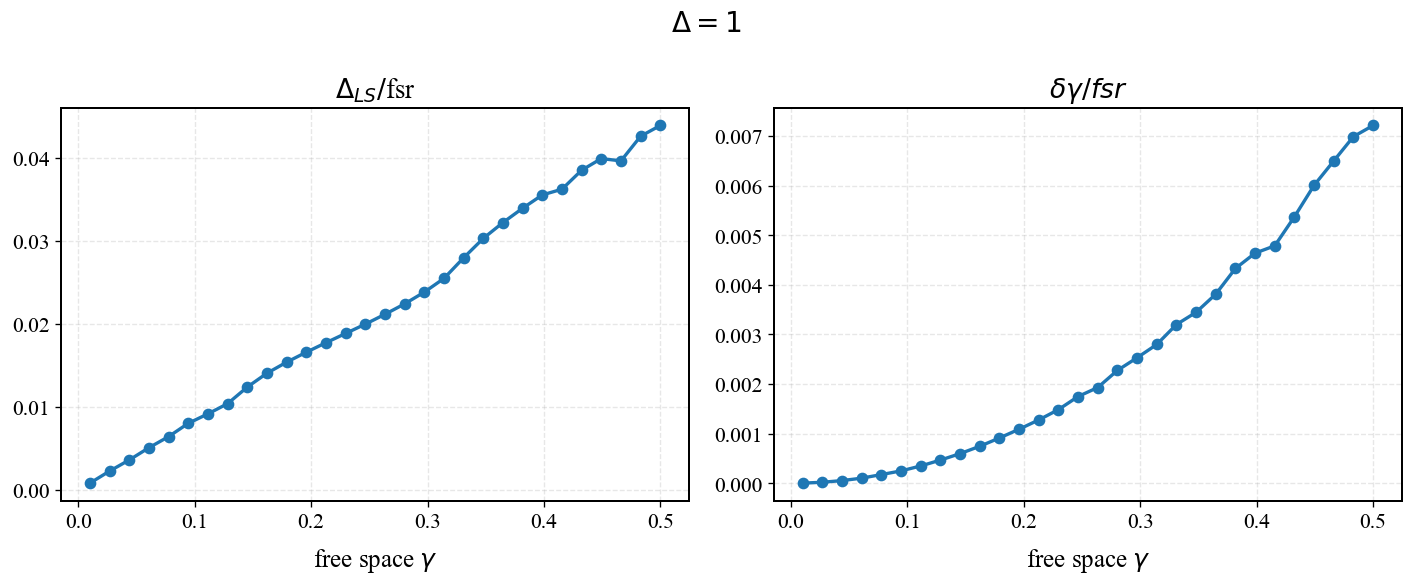

In [ ]:
_=exp003(Delta_0=1,n_modes=100,n_steps=1001,method_m='Powell',scale_log_x=False,scale_log_y=False)
# metodo: Powell

Update 29/12: I have tested 
1. using different optimization methods (TNC,L-BFGS-B,Powell)
2. changing the criterion (instead of min value in one oscillation, min value in two/three oscillations)

for some reason, I can't seem to get good convergence. 

# 4. Extra: Error VS frequency of the qubit $\Delta$ 

In [ ]:
from aux_funs import DDE_analytical,run_ww_simulation
from typing import Optional

def exp003(t_max: Optional[float] = None , gamma :float = 0.1, Delta_list: list = [5,20,50], n_modes_list: list =[20,40,60],L:float = 1, c: float = 1, n_steps: int = 201,n_modes=20):
	tau =2*L/c
	if t_max is None:
		t_max = 25*tau 

	fig,axs = plt.subplots(1,len(Delta_list),figsize=(8*len(Delta_list),5))
	
	for i,Delta in enumerate(Delta_list):
		error_nmodes=[]
		phi = 2*np.pi*Delta
		for n_modes in n_modes_list:
			t_ww,e_ww = run_ww_simulation(t_max=t_max,gamma=gamma,Delta=Delta,L=L,c=c,n_modes=n_modes,n_steps=n_steps)
			e_dde = np.abs(DDE_analytical(gamma=gamma,phi=phi,tau=tau,t=t_ww))**2
			error_nmodes.append(np.sum(np.abs(e_ww.T-e_dde))/np.sum(np.abs(e_ww)))

		axs[i].plot(n_modes_list,error_nmodes,'-o')
		axs[i].set_xlabel('number of modes')
		axs[i].set_ylabel('diference between ww and dde')
		axs[i].grid()
		axs[i].set_title(rf"$ \Delta = {Delta:.1f}$ F.S.R. ")
	fig.tight_layout()
	plt.show()



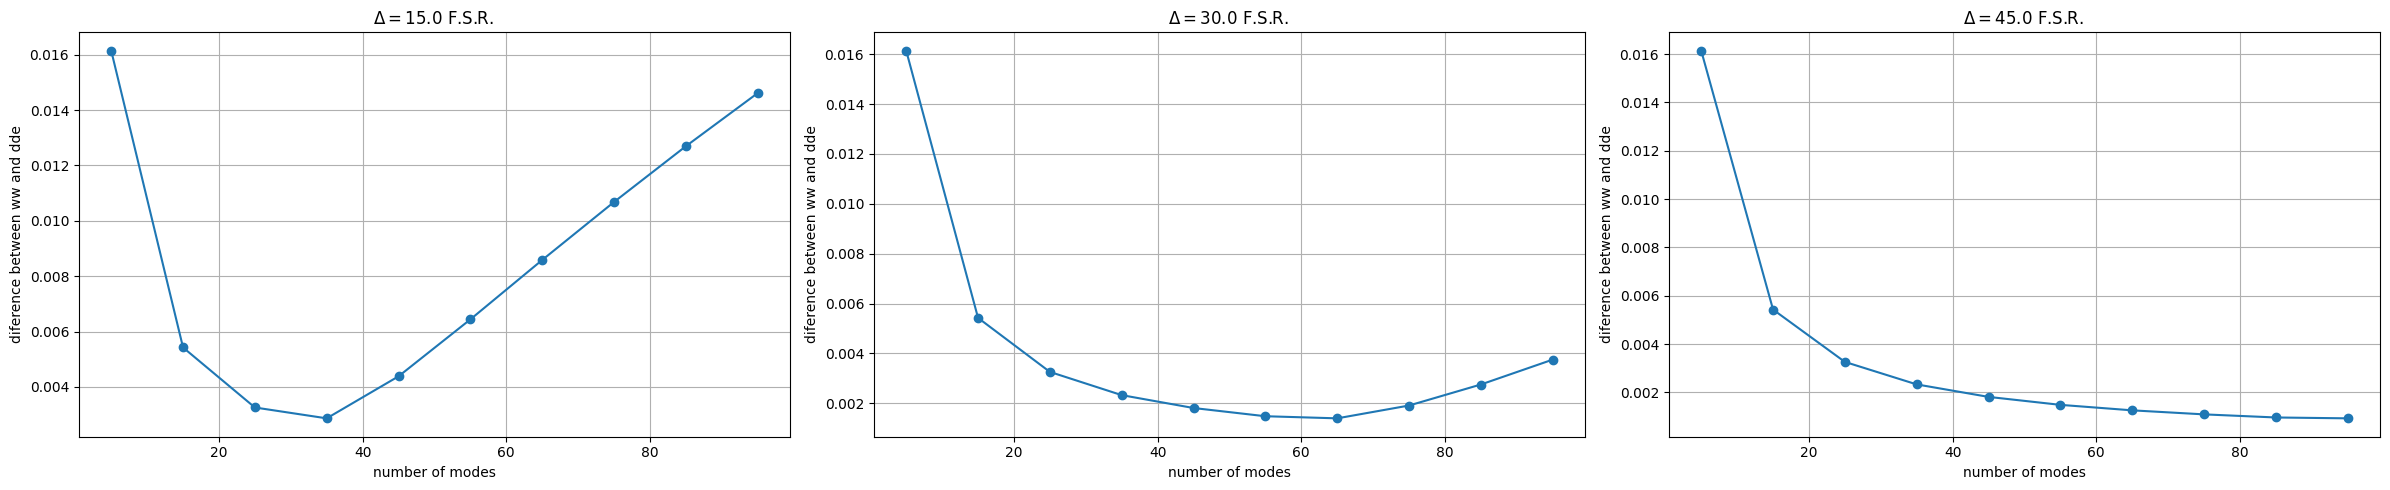

In [ ]:
exp003(Delta_list=[15,30,45],n_modes_list=list(range(5,96,10)))

# 5. Extra: analytical solution of the DDE

The result I dont want to prove (although I can) is 

\begin{equation}
\partial_{t}f(t) = -\gamma \sum_{n}e^{n\alpha \tau}f(t-n\tau)\Theta(t-n\tau) \longrightarrow f(t) = \Theta(t) + \sum_{n=1}^{\infty} e^{n\alpha \tau} \left[ \sum_{m=1}^{n} \binom{n-1}{m-1} (-\gamma)^{m} \frac{(t-n\tau)^{m}}{m!} \right] \Theta(t-n\tau)
\end{equation}

Now I show how this is related to the DDE for two qubits in a ring. The set of equations describing this system is: 

$$ \partial_{t} \hat{c}_{1}(t) = -\left(i\omega_{e} +\frac{\gamma}{2} \right) \hat{c}_{1}(t) - \gamma \sum_{m=1}^{\infty}  \hat{c}_{1}(t-(2n)\tau) -\gamma \sum_{n=1}^{\infty}\hat{c}_{2}(t-(2n-1)\tau) $$

$$ \partial_{t} \hat{c}_{2}(t) = -\left( i \omega_{e} + \frac{\gamma}{2} \right)\hat{c}_{2}(t) - \gamma \sum_{m=1}^{\infty}  \hat{c}_{2}(t-(2n)\tau) -\gamma \sum_{n=1}^{\infty}\hat{c}_{1}(t-(2n-1)\tau) $$

also, the analytical solution for bosons requires 

$$ \hat{c}_{1}(t) = J_{11}(t)\hat{c}_{1}(0) + J_{12}(t)\hat{c}_{2}(0) $$
$$ \hat{c}_{2}(t) = J_{21}(t)\hat{c}_{1}(0) + J_{22}(t)\hat{c}_{2}(0) $$

which leads to equations for functions, rather than operators. We now have two identical systems of coupled differential equations. 
\begin{cases}
\partial_{t}J_{11}(t) = -\left(i\omega_{e} +\frac{\gamma}{2} \right)J_{11}(t) - \gamma \sum_{m=1}^{\infty}  J_{11}(t-(2n)\tau) - \gamma \sum_{n=1}^{\infty}J_{21}(t-(2n-1)\tau) \\
\partial_{t}J_{21}(t) = -\left(i\omega_{e} +\frac{\gamma}{2} \right)J_{21}(t) - \gamma \sum_{m=1}^{\infty}  J_{21}(t-(2n)\tau) - \gamma \sum_{n=1}^{\infty}J_{11}(t-(2n-1)\tau) 
\end{cases}

Is the system that we need to solve. by defining $	\tilde{J}_{\pm}(t) = J_{11}(t) \pm J_{21}(t) $ we find that equations decouple into 

$$ \partial_{t} \tilde{J}_{\pm}(t) = -\left(i\omega_{e} +\frac{\gamma}{2} \right)\tilde{J}_{\pm}(t) - \gamma \sum_{m=1}^{\infty}  \tilde{J}_{\pm}(t-(2n)\tau) \mp \gamma \sum_{n=1}^{\infty}\tilde{J}_{\pm}(t-(2n-1)\tau) $$



The equation for $\tilde{J}_{-}(t) $ has a small twist. we can do 

\begin{equation}
\partial_{t}\tilde{J}_{-}(t) = -\left(i\omega_{e} +\frac{\gamma}{2} \right)\tilde{J}_{-}(t) - \gamma \sum_{m=1}^{\infty} e^{i(2n)\pi} \tilde{J}_{-}(t-(2n)\tau) - \gamma \sum_{n=1}^{\infty}e^{i(2n-1)\pi}\tilde{J}_{\pm}(t-(2n-1)\tau) 
\end{equation}
which is 
\begin{equation}
\partial_{t}\tilde{J}_{-}(t) = -\left(i\omega_{e} +\frac{\gamma}{2} \right)\tilde{J}_{-}(t) - \gamma \sum_{m=1}^{\infty} e^{in\pi} \tilde{J}_{-}(t-n\tau) 
\end{equation}

and, after going to the rotating frame, you get 

\begin{equation}
\partial_{t}J_{-}(t) =  - \gamma \sum_{m=1}^{\infty} e^{n\left[ i(\omega_{e}+\pi) + \frac{\gamma}{2} \right]\tau} \tilde{J}_{-}(t-n\tau) 
\end{equation}

which again can be solved. All of this is just to say that $J_{-}(t)$ is not quite the analytical solution to the cavity, the rotating frame has an extra $\pi$ that you need to be careful with.

The equation for $ \tilde{J}_{+}(t) $ is directly the equation for a qubit in a cavity, since we group up the even and odd terms and yield

$$ \partial_{t} \tilde{J}_{+}(t) = -\left(i\omega_{e} +\frac{\gamma}{2} \right)\tilde{J}_{+}(t) -\gamma \sum_{n}J_{+}(t-n\tau)$$
doing a rotating frame $ \tilde{J}(t) \to J(t)e^{-\left(i\omega_{e} +\frac{\gamma}{2} \right)t} $ we get 

$$ \partial_{t} J_{+}(t) =  -\gamma \sum_{n}e^{n\left(i\omega_{e} + \frac{\gamma}{2} \right)\tau}J_{+}(t-n\tau) $$
Which is the equation I was solving before. 


finally, the general solution is given by

\begin{cases}
\hat{c}_{1}(t) = \frac{J_{+}(t)+J_{-}(t)}{2} \hat{c}_{1}(0) + \frac{J_{+}(t)-J_{-}(t)}{2} \hat{c}_{2}(0) \\
\hat{c}_{2}(t) = \frac{J_{+}(t)-J_{-}(t)}{2} \hat{c}_{1}(0) + \frac{J_{+}(t)+J_{-}(t)}{2} \hat{c}_{2}(0)
\end{cases}